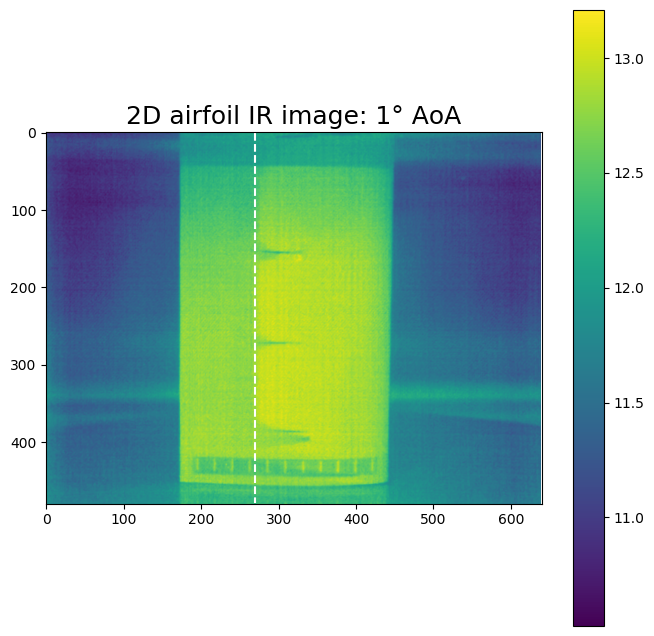

In [194]:
import os
import pandas as pd
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.style.use("default")
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=14)    # legend fontsize

from numpy import genfromtxt 

separation = []
# AOAlist = [-3,-2,-1,0,1,2,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,11,11.5,12,12.5,13,13.5,14,15,16,17]
# AOAlist = [9,9.5,11,11.5,12,12.5,13,13.5,14,15,16,17]
AOAlist = [1]


for AOA in AOAlist:
    folderName = f"alpha {AOA}"

    data = []
    for filename in os.listdir(folderName):
        if filename.endswith(".csv"):
            df=pd.read_csv(f'{folderName}/{filename}', sep=';',header=None)
            df = df.astype(str).replace(",",".",regex=True).astype(float)
            data.append(df)

    image = sum(data)/len(data)
    
    # Gets change in boundry layer
    length = 430
    
    if AOA >=7.5 and AOA <9:
        length = 445
    elif AOA>=9.0:
        length = 450
    size = int((length-190)/5)
    BoundaryLayer = image.iloc[200:300,190:length].sum().to_numpy(dtype='float')
    BoundaryDiff = np.absolute(np.diff(BoundaryLayer.reshape((size,5)).sum(axis=1)))
    boundaryPosition = np.absolute(np.diff(BoundaryLayer.reshape((size,5)).sum(axis=1))).argmax()*5 + np.absolute(np.diff(BoundaryLayer.reshape((size,5))))[BoundaryDiff.argmax()].argmax() +190

    
    separation.append(boundaryPosition)
    
    row , _ = image.shape
    boundryY = np.linspace(0,row-1,100)
    
    figure(figsize=(8, 8))
    plt.title(f'2D airfoil IR image: {AOA}° AoA')
    plt.imshow(image, interpolation="bicubic")
    plt.colorbar()
    plt.plot([boundaryPosition]*100,boundryY,'w--')
    plt.savefig(f"{AOA}_AOA.png", dpi=80)
    plt.show()
  
    

# Discover change in intensity

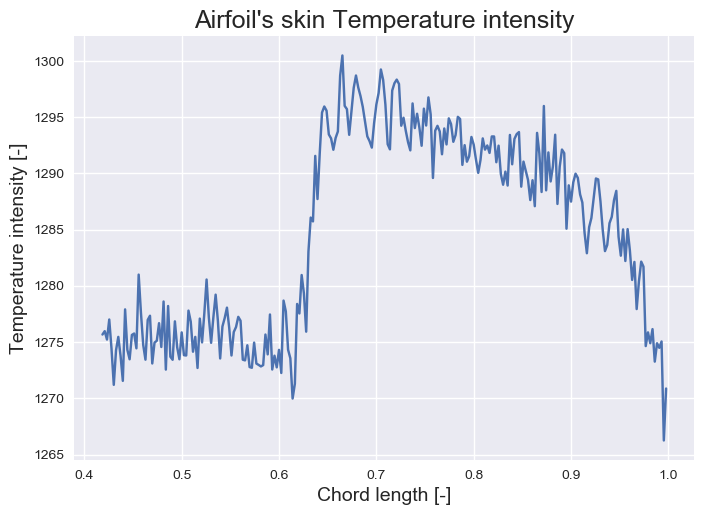

In [224]:
BoundaryLayer = image.iloc[200:300,180:430].sum() # +180 to go back to initial indice
# BoundaryDiff = np.absolute(np.diff(BoundaryLayer.reshape((51,5)).sum(axis=1)))
# idx = np.absolute(np.diff(BoundaryLayer.reshape((51,5)).sum(axis=1))).argmax()*5 + np.absolute(np.diff(BoundaryLayer.reshape((51,5))))[BoundaryDiff.argmax()].argmax() +180
plt.style.use('seaborn')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=14)    # legend fontsize

plt.title("Airfoil's skin Temperature intensity")
plt.ylabel("Temperature intensity [-]")
plt.xlabel("Chord length [-]")
plt.plot(np.arange(180,430,1)/(430),BoundaryLayer.to_numpy(dtype='float'))
plt.savefig('temperatureIntensity.png', dpi=200)
plt.show()


# Transition X angle of attack

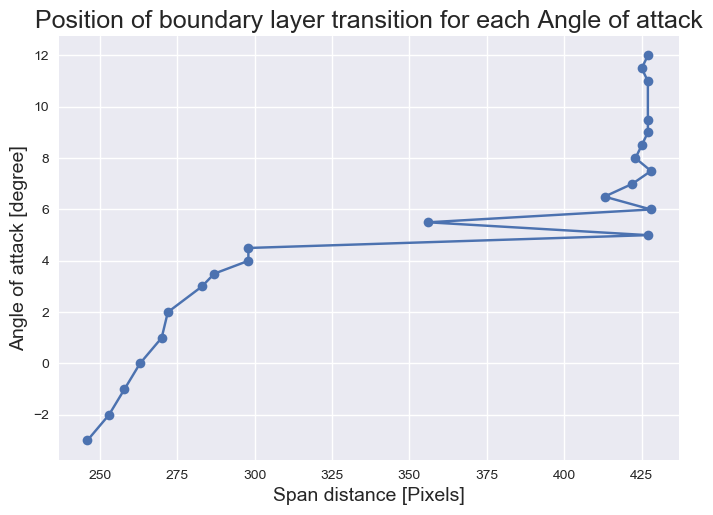

In [159]:

plt.title("Position of boundary layer transition for each Angle of attack")
plt.ylabel("Angle of attack [degree]")
plt.xlabel("Span distance [Pixels]")
plt.plot(separation[:-7],AOAlist[:-7],marker="o")
# plt.savefig('temperatureIntensity.png', dpi=1000)
plt.show()

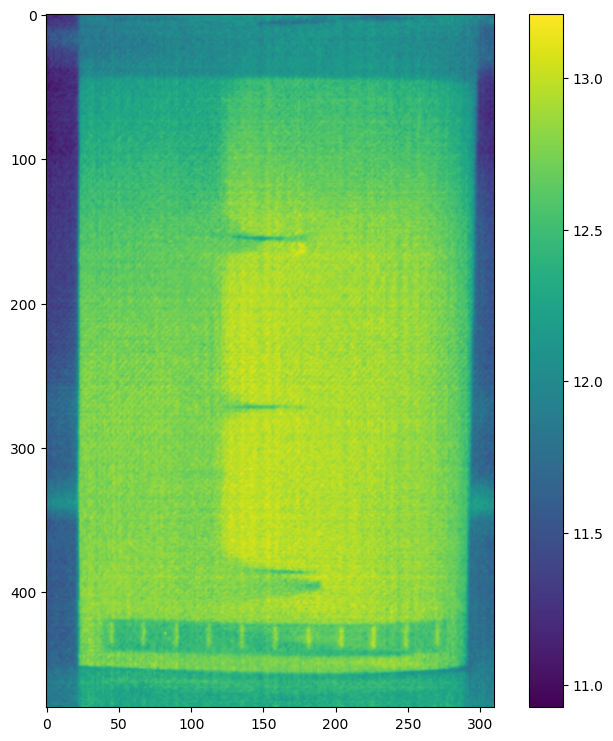

In [173]:

imageEdit = image.iloc[:,150:460].copy()
# pixelMax = imageEdit.quantile(0.5)
# imageEdit[imageEdit<=pixelMax] = 0

figure(figsize=(9, 9))
plt.imshow(imageEdit, interpolation='bicubic')
plt.colorbar()
plt.show()

# pd.Series(df.values).describe()
# pd.Series(np.concatenate( image.values, axis=0 )).describe()